# Bagian Baru

In [ ]:
import pandas as pd
import os
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt


uploaded = files.upload()

data = pd.read_excel('Data_Curah_Hujan.xlsx')

# Menampilkan 5 baris pertama untuk melihat struktur data
data.head()





Saving Data_Curah_Hujan.xlsx to Data_Curah_Hujan (1).xlsx


,Tahun,Bulan,Tanggal,Suhu_jam7,Suhu_jam13,Suhu_jam18,Suhu_rata2,Suhu_rata2_24,Suhu_max,Suhu_min,...,Tekanan_udara,Kelembaban_jam7,Kelembaban_jam13,Kelembaban_jam18,Kelembaban_rata2,Kelembaban_rata2_24,KecepatanAngin_rata2,Arah_terbanyak,Kecepatan_max,Arah_angin
0,2020,8,1,24.1,32.5,28.6,27.3,27.9,33.6,23.3,...,1011.4,80.126834,53.137043,72.262296,71,70,4.875,TG,12,130
1,2020,8,2,24,32.3,28.5,27.2,28,32.8,23.3,...,1010.8,84.089058,49.14069,71.523597,72,69,4.083333,T,11,130
2,2020,8,3,23.7,32.7,28.5,27.2,28.6,33,23.5,...,1010.9,83.159701,56.079228,76.338265,75,72,5.541667,TG,10,130
3,2020,8,4,26.5,31.8,28.3,28.3,28.2,33,24.7,...,1009.1,80.451899,60.520376,69.368028,73,74,3.791667,TG,10,120
4,2020,8,5,25.3,31.2,29.8,27.9,28.5,32.7,24.4,...,1010.1,83.005162,58.873915,71.618485,74,73,3.625,TG,9,60


In [ ]:
# Memastikan kolom 'Tahun', 'Bulan', dan 'Tanggal' dalam format numerik
data[['Tahun', 'Bulan', 'Tanggal']] = data[['Tahun', 'Bulan', 'Tanggal']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris dengan nilai NaN di kolom Tahun, Bulan, atau Tanggal
data = data.dropna(subset=['Tahun', 'Bulan', 'Tanggal'])

# Membuat kolom 'Tanggal' dalam format datetime
# Rename columns to 'year', 'month', 'day' for pd.to_datetime
data['Tanggal'] = pd.to_datetime(data[['Tahun', 'Bulan', 'Tanggal']].rename(columns={'Tahun': 'year', 'Bulan': 'month', 'Tanggal': 'day'}))

# Menampilkan hasil 5 baris pertama
data[['Tahun', 'Bulan', 'Tanggal', 'Tanggal']].head()

,Tahun,Bulan,Tanggal,Tanggal
0,2020,8,2020-08-01,2020-08-01
1,2020,8,2020-08-02,2020-08-02
2,2020,8,2020-08-03,2020-08-03
3,2020,8,2020-08-04,2020-08-04
4,2020,8,2020-08-05,2020-08-05


In [ ]:
# Langkah 1: Normalisasi data
scaler = MinMaxScaler()

print(data.columns)

# Replace '-' with NaN and then drop rows with NaN in 'Curah_hujan'
data['Curah_hujan'] = pd.to_numeric(data['Curah_hujan'], errors='coerce')
data = data.dropna(subset=['Curah_hujan'])

data_scaled = scaler.fit_transform(data[['Curah_hujan']].values)

Index(['Tahun', 'Bulan', 'Tanggal', 'Suhu_jam7', 'Suhu_jam13', 'Suhu_jam18',
       'Suhu_rata2', 'Suhu_rata2_24', 'Suhu_max', 'Suhu_min', 'Curah_hujan',
       'Lama_jampenyinaran', 'Persen_jampenyinaran', 'Peristiwa_khusus',
       'Tanggal.1', 'Tekanan_udara', 'Kelembaban_jam7', 'Kelembaban_jam13',
       'Kelembaban_jam18', 'Kelembaban_rata2', 'Kelembaban_rata2_24',
       'KecepatanAngin_rata2', 'Arah_terbanyak', 'Kecepatan_max',
       'Arah_angin'],
      dtype='object')


In [ ]:
import numpy as np # Import the numpy library and alias it as 'np'

# Membentuk data time series
window_size = 30  # Misalnya, menggunakan 30 hari sebelumnya untuk memprediksi
X = []
y = []

for i in range(len(data_scaled) - window_size):
    X.append(data_scaled[i:i+window_size])
    y.append(data_scaled[i+window_size])

X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Menampilkan ukuran data untuk memastikan pembagian berhasil
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")


Ukuran data latih: (117, 30, 1)
Ukuran data uji: (30, 30, 1)


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),  # Menambahkan Dropout untuk mengurangi overfitting
    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),  # Dropout di sini juga
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)

# Menggunakan optimizer Adam dan mengatur learning rate lebih rendah
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')


In [ ]:
# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


# Tampilkan riwayat pelatihan
print("Model telah selesai dilatih.")


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - loss: 0.0638 - val_loss: 0.0860
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0558 - val_loss: 0.0756
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0457 - val_loss: 0.0636
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0370 - val_loss: 0.0538
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0412 - val_loss: 0.0530
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0393 - val_loss: 0.0531
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0393 - val_loss: 0.0552
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0393 - val_loss: 0.0574
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0407 - val_loss: 0.0587
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0395 - val_loss: 0.0592
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0394 - val_loss: 0.0587
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.0376 - val_lo

In [ ]:
# Prediksi data pengujian
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Mengembalikan skala ke nilai asli
y_test_original = scaler.inverse_transform(y_test)

# Evaluasi hasil
predictions = model.predict(X_test)

print("Prediksi selesai.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediksi selesai.


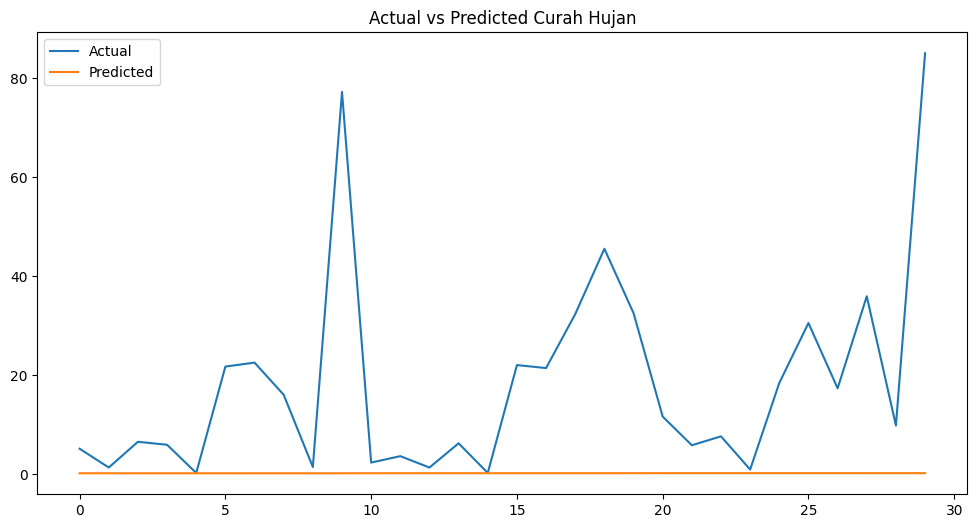

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual') # Use y_test_original instead of y_test_rescaled
plt.plot(predictions, label='Predicted') # Use predictions instead of predictions_rescaled
plt.legend()
plt.title('Actual vs Predicted Curah Hujan')
plt.show()

In [ ]:
# Balikkan normalisasi untuk interpretasi
y_test_rescaled = scaler.inverse_transform(y_test)
predictions_rescaled = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluasi dengan MSE dan MAE
mse_optimized = mean_squared_error(y_test_rescaled, predictions_rescaled)
mae_optimized = mean_absolute_error(y_test_rescaled, predictions_rescaled)

mse_optimized, mae_optimized

(440.58297361626353, 14.512566788991291)